In [1]:
import pandas as pd
import numpy as np
from tabulate import tabulate
from matplotlib import pyplot as plt
from scipy.stats import randint
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn import preprocessing
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv('dfLimpioV1.csv')

In [3]:
del df['Unnamed: 0']

In [4]:
df.head(5)

,ID Candidato,Género,Carrera Gestional,Avance,Semestres Totales,Postulados Si/No,Evaluados Si/No,Altamente Recomendado,Operaciones-Calidad,MTTO-DIMA,Comercial-Planeamiento,DIGI-SC,Resto-Soft,Apto/No Apto,Destacado Pym,Ingles,Apto/ Destacado,Ingresados Si/No
0,0.0,F,Ing. Industrial,NaN,NaN,Si,Si,Si,5,3,5,1,1,1,1,4,2,1
1,1.0,F,Ing. Industrial,6.0,9.0,Si,Si,Si,5,1,1,1,1,1,1,4,2,0
2,2.0,F,Ing. Mecatrónica/Electrónica,6.0,9.0,Si,Si,Si,5,5,1,3,5,1,1,4,2,1
3,3.0,F,Negocios Internacionales,NaN,NaN,Si,Si,NaN,0,0,0,0,0,0,0,0,,0
4,4.0,M,Ing. Química,6.0,9.0,Si,Si,NaN,1,1,1,1,1,0,0,0,,0


In [5]:
print(f"Forma de la tabla {df.shape}")

Forma de la tabla (1050, 18)


# Variables Independientes 

### - Operaciones-Calidad	
### - MTTO-DIMA	
### - Comercial-Planeamiento	
### - DIGI-SC	
### - Resto-Soft
### - Apto/No Apto	

### Las primeras 5 son las pruebas Pymetrics de los examanes que presentaron los candidatos, luego tenemos la variable de Apto/No Apto que se genero a partir de las pruebas Pymetrics. Esta nos indica si el candidato es rocomendado el almenos una prueba. 

# Variable Dependiente

### - Destacado Pym

### Esta variable indica si el candidato es una persona destacada considerando las pruebas Pymetrics

# Tipo de Modelos 

### Se probaran distintos modelos de clasificacion, ya que estamos lidiando con una columna dependiente binaria, es decri 1´s y 0´s. Por lo que es más conveniente usar algoritmos de clasificacion como estamos tratando con valores discretos . Estaremos indicando la categoria a la que pertenecen los reultados dentro de un numero distinto de    posibilidades, y por eso conviene más usar un modelo de clasificacion que uno de regresion.

In [6]:
feature_names = df.columns
feature_names = feature_names.drop(["Apto/No Apto","Apto/ Destacado", "Altamente Recomendado", "ID Candidato", "Género", "Carrera Gestional", "Avance", "Semestres Totales", "Postulados Si/No", "Evaluados Si/No", "Ingles", "Ingresados Si/No", "Destacado Pym"])
X = df[feature_names]
y = df["Destacado Pym"]

# Balanceo de Datos

In [7]:
ros = RandomOverSampler(shrinkage=0.1)
XX, yy = ros.fit_resample(X, y)

yy.value_counts()

1    826
0    826
Name: Destacado Pym, dtype: int64

# Dividimos los datos

In [8]:
X_train, X_test, y_train, y_test = train_test_split(XX, yy, test_size=0.2)

In [9]:
X_train.head(5)

,Operaciones-Calidad,MTTO-DIMA,Comercial-Planeamiento,DIGI-SC,Resto-Soft
1581,0,1,5,3,5
277,1,1,1,1,1
226,1,5,1,1,1
632,1,1,1,1,1
61,1,1,1,1,3


In [10]:
X_train.shape, y_train.shape

((1321, 5), (1321,))

# Escalamiento de Datos

In [11]:
#std_scl=preprocessing.StandardScaler()
#X_train_array = std_scl.fit_transform(X_train.values)
#X_train = pd.DataFrame(X_train_array, index=X_train.index, columns=X_train.columns)
#X_test_array = std_scl.transform(X_test.values)
#X_test = pd.DataFrame(X_test_array, index=X_test.index, columns=X_test.columns)

# Modelos 

In [12]:
models = []
models.append(('K - Nearest Neighbors Classifier ', KNeighborsClassifier()))
models.append(('Support Vector Machine Classifier', SVC(kernel = 'linear', probability = True)))
models.append(('Logistic Regression              ', LogisticRegression(max_iter=10000)))
models.append(('Gaussian Naive Bayes             ', GaussianNB()))
models.append(('Random Forest Classifier         ', RandomForestClassifier(n_estimators = 100, criterion = 'entropy')))
models.append(('Gradient Boosting Classifier     ', GradientBoostingClassifier()))
models.append(('Decision Tree                    ', DecisionTreeClassifier()))


In [13]:
ac_score = ["Accuracy: "]
pre_score = ["Precision: "]
sen_score = ["Sensitivity: "]
espe_score = ["Specificity: "]
roc_score = ["Roc Auc Score: "]
cfm_list = []
y_prob_list = []

In [14]:
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cfm = confusion_matrix(y_test, y_pred)
    y_pred_prob_pos =model.predict_proba(X_test)[:,1]
    TP = cfm[1][1]
    TN = cfm[0][0]
    FP = cfm[0][1]
    FN = cfm[1][0]
    x1 = str(round(accuracy_score(y_test, y_pred),3))
    x2 = "True Positive: " + str(TP) + " True Negative: " + str(TN) + " False Positivee: " + str(FP) + " False Negative: " + str(FN)
    x3 = str(round(precision_score(y_test, y_pred),3))
    x4 = str(round(TP/(TP+FN),3))
    x5 = str(round(TN/(TN+FP),3))
    x6 = str(round(roc_auc_score(y_test,y_pred_prob_pos),3))
    ac_score += [x1]
    cfm_list += [x2]
    pre_score += [x3]
    sen_score += [x4]
    espe_score += [x5]
    roc_score += [x6]
    y_prob_list += [y_pred_prob_pos]
    

In [15]:
models_list = models

for (name, mod), ac in zip(models_list, cfm_list):
    print(name + " --- "+ ac)

K - Nearest Neighbors Classifier  --- True Positive: 146 True Negative: 130 False Positivee: 32 False Negative: 23
Support Vector Machine Classifier --- True Positive: 129 True Negative: 109 False Positivee: 53 False Negative: 40
Logistic Regression               --- True Positive: 126 True Negative: 117 False Positivee: 45 False Negative: 43
Gaussian Naive Bayes              --- True Positive: 119 True Negative: 122 False Positivee: 40 False Negative: 50
Random Forest Classifier          --- True Positive: 155 True Negative: 135 False Positivee: 27 False Negative: 14
Gradient Boosting Classifier      --- True Positive: 156 True Negative: 129 False Positivee: 33 False Negative: 13
Decision Tree                     --- True Positive: 139 True Negative: 137 False Positivee: 25 False Negative: 30


In [16]:
total = ["Total: ",0,0,0,0,0,0,0]

data = [ac_score, pre_score, sen_score, espe_score, roc_score]

for x in data:
    total[1] += float(x[1])
    total[2] += float(x[2])
    total[3] += float(x[2])
    total[4] += float(x[4])
    total[5] += float(x[5])
    total[6] += float(x[6])
    total[7] += float(x[7])
    
data = [ac_score, pre_score, sen_score, espe_score, roc_score, total]

col_names = ["KNN", "SVM", "LogR", "Bayes", "RandF", "GB", "Dtree"]

print(tabulate(data, headers=col_names))

                  KNN    SVM    LogR    Bayes    RandF     GB    Dtree
--------------  -----  -----  ------  -------  -------  -----  -------
Accuracy:       0.834  0.719   0.734    0.728    0.876  0.861    0.834
Precision:      0.82   0.709   0.737    0.748    0.852  0.825    0.848
Sensitivity:    0.864  0.763   0.746    0.704    0.917  0.923    0.822
Specificity:    0.802  0.673   0.722    0.753    0.833  0.796    0.846
Roc Auc Score:  0.903  0.785   0.789    0.817    0.958  0.961    0.897
Total:          4.223  3.649   3.649    3.75     4.436  4.366    4.247


### Graficas Roc

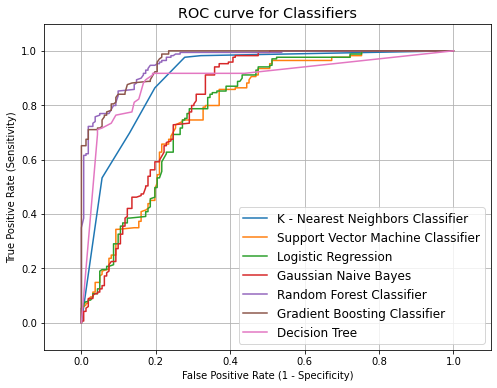

In [17]:
plt.figure(figsize=(8, 6))
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Classifiers') 
plt.xlabel('False Positive Rate (1 - Specificity)') 
plt.ylabel('True Positive Rate (Sensitivity)') 
plt.grid(True)
    
models_list = models

for (name, mod), ac in zip(models_list, y_prob_list):
    fpr, tpr, thresholds = roc_curve(y_test, ac)
    plt.plot(fpr, tpr, label=name)
    
plt.legend()

### Arbol de Desiciones

In [18]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_1 <= 1.50
|   |--- feature_0 <= 1.50
|   |   |--- feature_3 <= 3.50
|   |   |   |--- feature_2 <= 3.50
|   |   |   |   |--- feature_3 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_3 >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  3.50
|   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  0.50
|   |   |   |   |   |--- feature_3 <= 1.50
|   |   |   |   |   |   |--- feature_2 <= 4.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_2 >  4.50
|   |   |   |   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_0 >  0.50
|   |   |   |   |   |   |   |   |--- feature_4 <= 2.00
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_4 >  2.00
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_3 >  1.50
|   |   |  

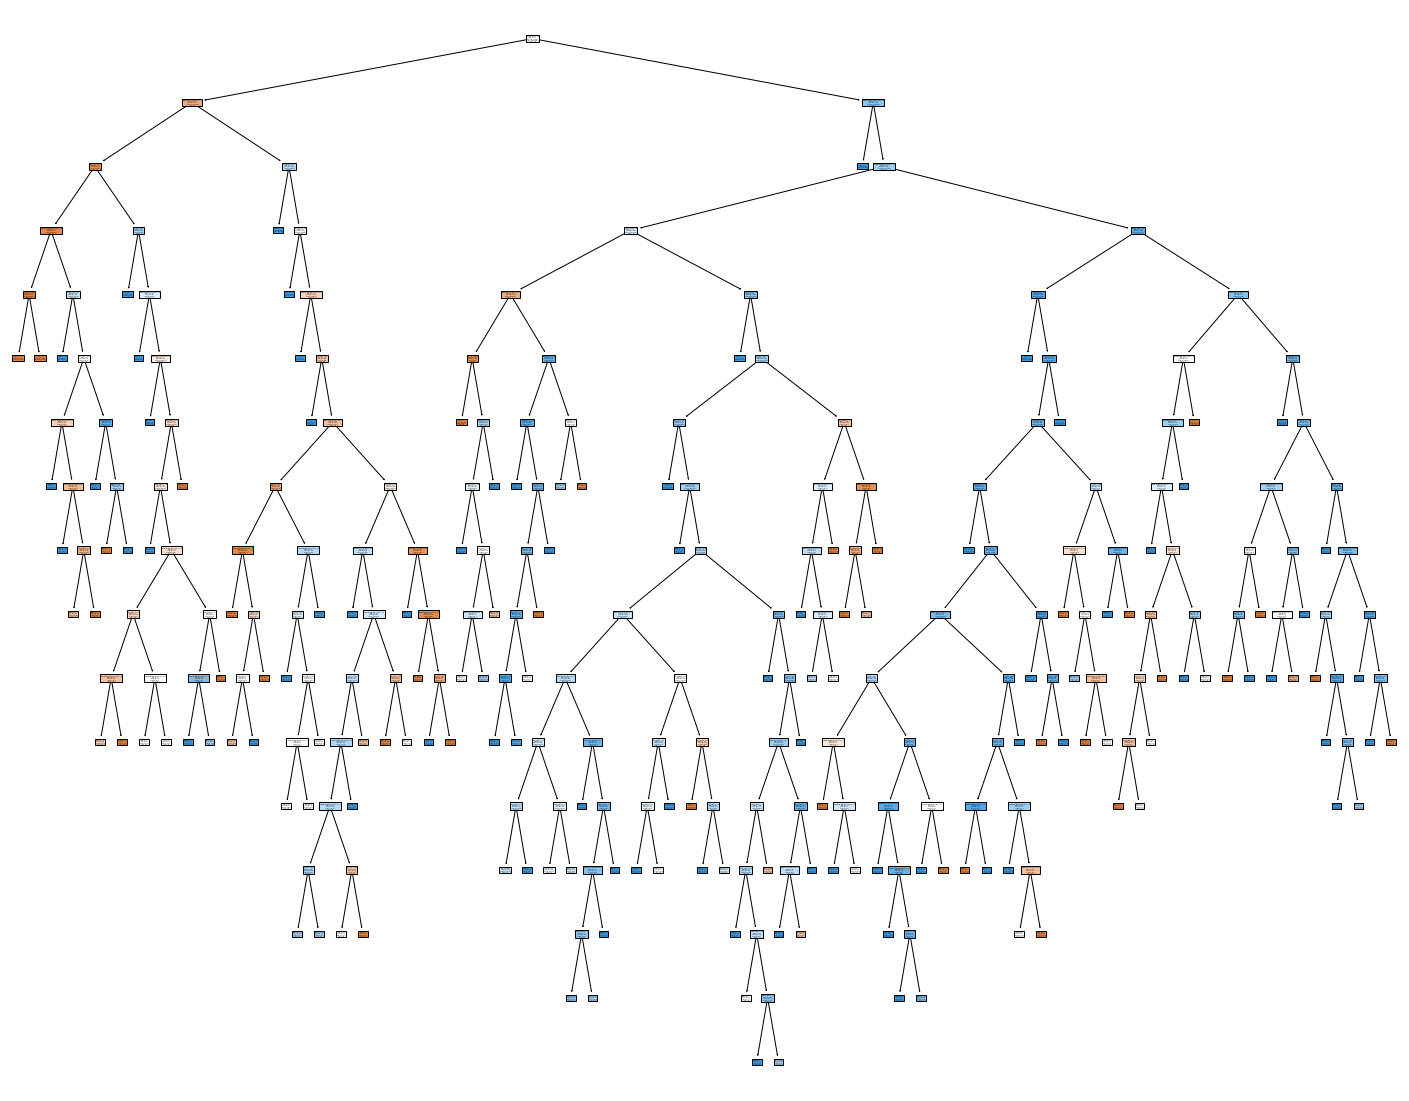

In [19]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=("Operaciones-Calidad","MTTO-DIMA","Comercial-Planeamiento","DIGI-SC","Resto-Soft"),  
                   class_names=("Destacado Pym"),
                   filled=True)


# Ajuste de Hiperparametros

### K-neighbors

In [20]:
param_grid = {'n_neighbors':np.arange(1,50)}

In [21]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(XX,yy)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [22]:
print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'n_neighbors': 45}
0.8239531264304677


#### El mejor hiperparametro para K-Neighbors es de 1

### Arbol de decision

In [23]:
param_dist = {"max_depth": [3, 5, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

param_grid = {"max_depth": [5,8,10,12,15, None],
              "max_features": ['auto'],
              "min_samples_leaf": [1,2,3,4,5,6,7,8,9],
              "criterion": ["gini", "entropy"]}

tree = DecisionTreeClassifier()

# 2 opciones
#tree_cv = RandomizedSearchCV(tree, param_dist, cv=5, scoring="roc_auc")
tree_cv = GridSearchCV(tree, param_grid, cv=5)

In [24]:
tree_cv.fit(X, y)

# Print the tuned parameters and score
print(f"Tuned Decision Tree Parameters: {tree_cv.best_params_}")
print(f"Best score is {tree_cv.best_score_}")

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'auto', 'min_samples_leaf': 4}
Best score is 0.7857142857142857


#### Los mejores hiperparametros de Arbol de Desicion son los mencionados arriba

# Cross Validation K-Folds

### K-neighbors

In [25]:
Knei = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
scores = cross_val_score(Knei, XX, yy, cv=5, scoring='f1_macro')
print(f"Average: {round(scores.mean(),2)} Std Dev: +/-{round(scores.std(),2)}")

Average: 0.82 Std Dev: +/-0.12


### Arbol de Decision

In [26]:
DecTree = DecisionTreeClassifier(criterion="entropy", max_depth=12, max_features="auto", min_samples_leaf=1)
scores = cross_val_score(DecTree, XX, yy, cv=5, scoring='f1_macro')
print(f"Average: {round(scores.mean(),2)} Std Dev: +/-{round(scores.std(),2)}")

Average: 0.83 Std Dev: +/-0.15
